<a href="https://colab.research.google.com/github/SuciRosyida03/Tubes-Mocu/blob/main/Satelit_Saat_TMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting & Install Packages

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install modul tambahan

In [ ]:
!pip install netcdf4 cartopy satpy pyyaml==5.4.1 pycoast
!pip install shapely --no-binary shapely --force
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 17.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 24.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 52.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to 

In [ ]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore') #ignores simple warning
from glob import glob

import numpy as np
import xarray as xr
from satpy import enhancements, composites
from satpy.writers import to_image

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from celluloid import Camera # getting the camera
from IPython.display import HTML


In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/HIMAWARI8_NC/'
!ls $datdir

mslp.2021.nc  rhum.2021.nc  uwnd.2021.nc  vwnd.2021.nc


Domain ruang dan waktu

In [ ]:
lon=slice(90,150)
lat=slice(30,-25)
time=slice('2021-09-25','2021-09-29')

## Convective Strom


### 25 Sept

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/'
!ls $datdir

NC_H08_20210925_0000_R21_FLDK.02401_02401.nc
NC_H08_20210925_0100_R21_FLDK.02401_02401.nc
NC_H08_20210925_0200_R21_FLDK.02401_02401.nc
NC_H08_20210925_0300_R21_FLDK.02401_02401.nc
NC_H08_20210925_0400_R21_FLDK.02401_02401.nc
NC_H08_20210925_0500_R21_FLDK.02401_02401.nc
NC_H08_20210925_0600_R21_FLDK.02401_02401.nc
NC_H08_20210925_0700_R21_FLDK.02401_02401.nc
NC_H08_20210925_0800_R21_FLDK.02401_02401.nc
NC_H08_20210925_0900_R21_FLDK.02401_02401.nc
NC_H08_20210925_1000_R21_FLDK.02401_02401.nc
NC_H08_20210925_1100_R21_FLDK.02401_02401.nc
NC_H08_20210925_1200_R21_FLDK.02401_02401.nc
NC_H08_20210925_1300_R21_FLDK.02401_02401.nc
NC_H08_20210925_1400_R21_FLDK.02401_02401.nc
NC_H08_20210925_1500_R21_FLDK.02401_02401.nc
NC_H08_20210925_1600_R21_FLDK.02401_02401.nc
NC_H08_20210925_1700_R21_FLDK.02401_02401.nc
NC_H08_20210925_1800_R21_FLDK.02401_02401.nc
NC_H08_20210925_1900_R21_FLDK.02401_02401.nc
NC_H08_20210925_2000_R21_FLDK.02401_02401.nc
NC_H08_20210925_2100_R21_FLDK.02401_02401.nc
NC_H08_202

In [ ]:
#Data Himawari 8
files=glob(datdir+'NC_H08*')
len(files)

24

In [ ]:
files

['/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0000_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0100_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0200_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0300_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0400_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0500_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0600_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0700_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0800_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/25sep/NC_H08_20210925_0900_R21_FLDK.02401_02401.nc',
 '/content

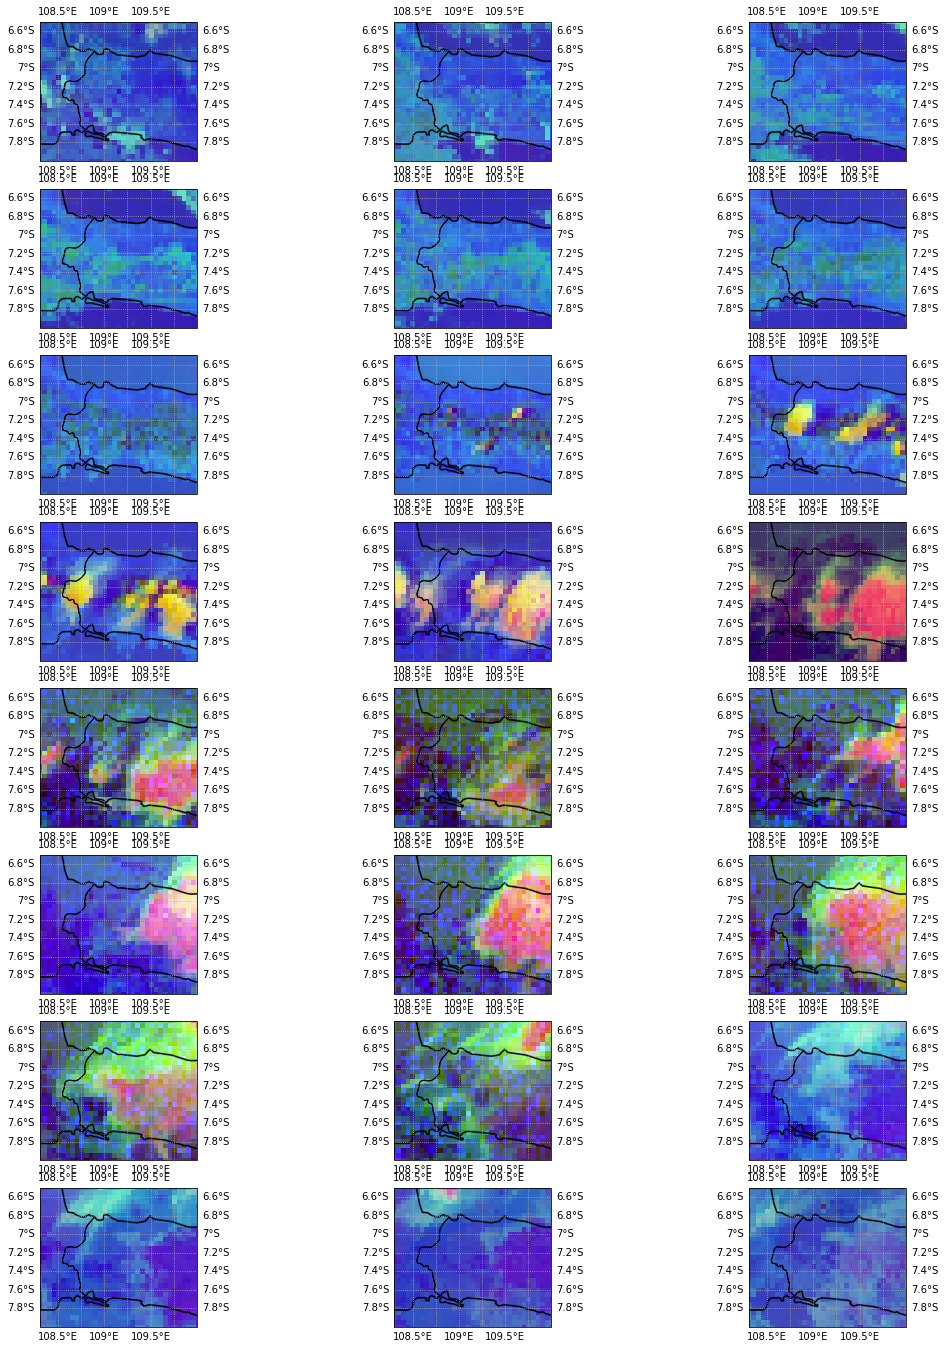

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 24))

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)
  ds_crop

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax = fig.add_subplot(8, 3, i+1, projection=mproj)
  # Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')


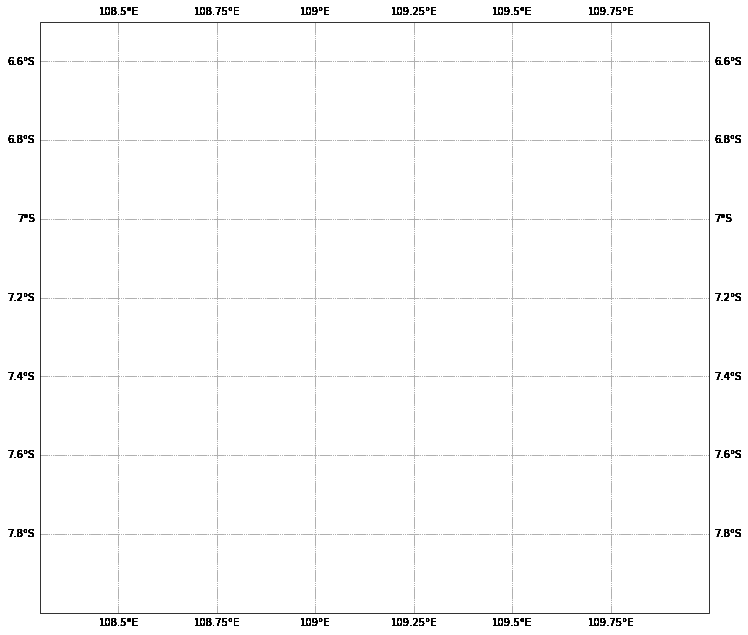

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
ax = fig. add_subplot(1, 1, 1, projection=mproj)

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
# Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')
  # ax.set_title(files[i][-41:-24])
  ax.text(90.5,28.5,files[i][-41:-24])

  camera.snap()

animation = camera.animate(interval = 1000, repeat = False)

In [ ]:
HTML(animation.to_html5_video())

### 26 Sept

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/'
!ls $datdir

NC_H08_20210926_0000_R21_FLDK.02401_02401.nc
NC_H08_20210926_0100_R21_FLDK.02401_02401.nc
NC_H08_20210926_0200_R21_FLDK.02401_02401.nc
NC_H08_20210926_0300_R21_FLDK.02401_02401.nc
NC_H08_20210926_0400_R21_FLDK.02401_02401.nc
NC_H08_20210926_0500_R21_FLDK.02401_02401.nc
NC_H08_20210926_0600_R21_FLDK.02401_02401.nc
NC_H08_20210926_0700_R21_FLDK.02401_02401.nc
NC_H08_20210926_0800_R21_FLDK.02401_02401.nc
NC_H08_20210926_0900_R21_FLDK.02401_02401.nc
NC_H08_20210926_1000_R21_FLDK.02401_02401.nc
NC_H08_20210926_1100_R21_FLDK.02401_02401.nc
NC_H08_20210926_1200_R21_FLDK.02401_02401.nc
NC_H08_20210926_1300_R21_FLDK.02401_02401.nc
NC_H08_20210926_1400_R21_FLDK.02401_02401.nc
NC_H08_20210926_1500_R21_FLDK.02401_02401.nc
NC_H08_20210926_1600_R21_FLDK.02401_02401.nc
NC_H08_20210926_1700_R21_FLDK.02401_02401.nc
NC_H08_20210926_1800_R21_FLDK.02401_02401.nc
NC_H08_20210926_1900_R21_FLDK.02401_02401.nc
NC_H08_20210926_2000_R21_FLDK.02401_02401.nc
NC_H08_20210926_2100_R21_FLDK.02401_02401.nc
NC_H08_202

In [ ]:
#Data Himawari 8
files=glob(datdir+'NC_H08*')
len(files)

24

In [ ]:
files

['/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0000_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0100_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0200_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0300_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0400_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0500_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0600_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0700_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0800_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/26sep/NC_H08_20210926_0900_R21_FLDK.02401_02401.nc',
 '/content

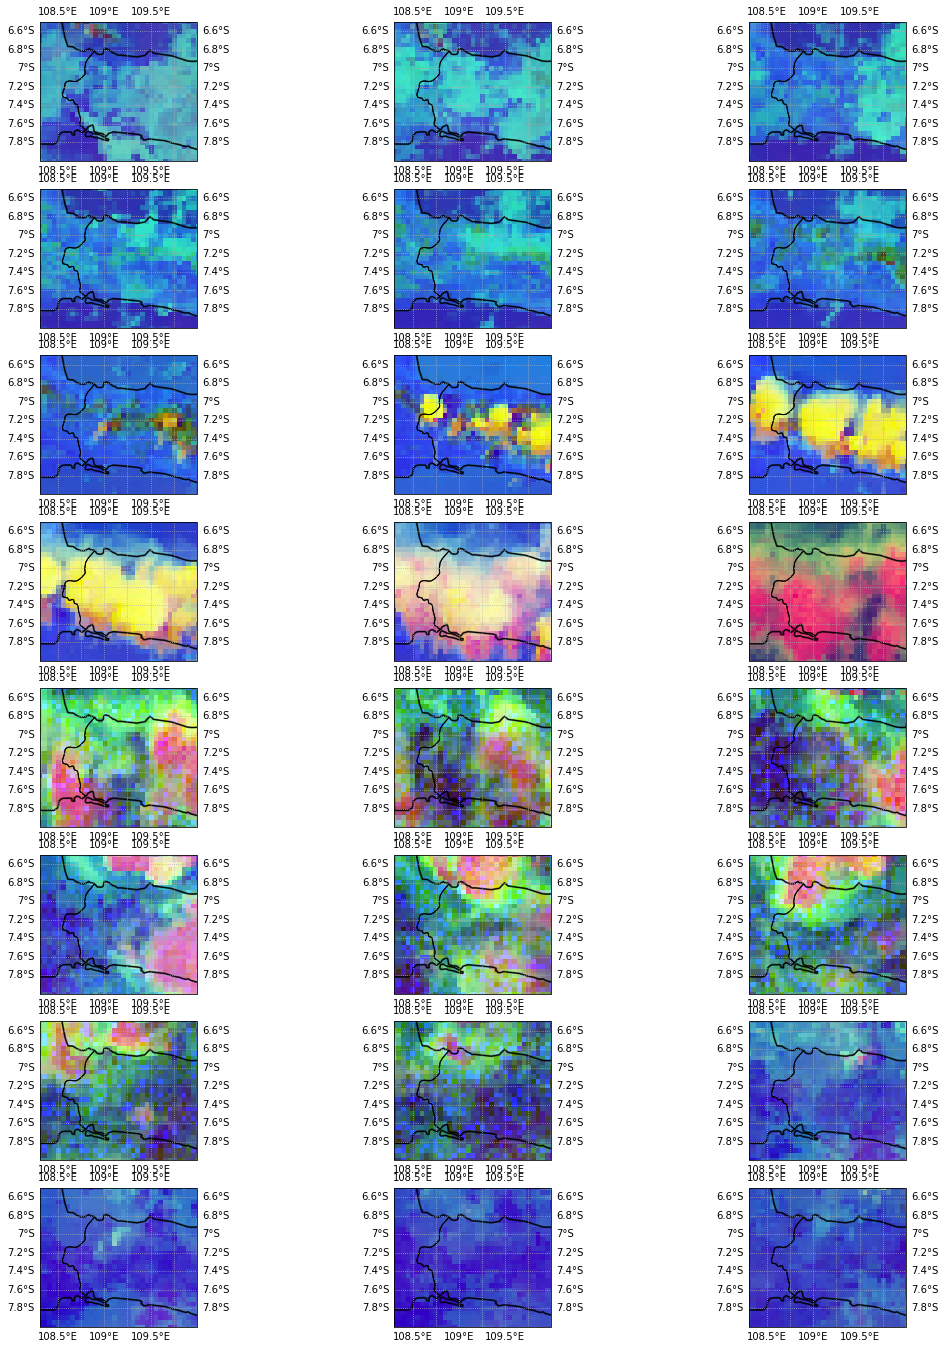

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 24))

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)
  ds_crop

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax = fig.add_subplot(8, 3, i+1, projection=mproj)
  # Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')


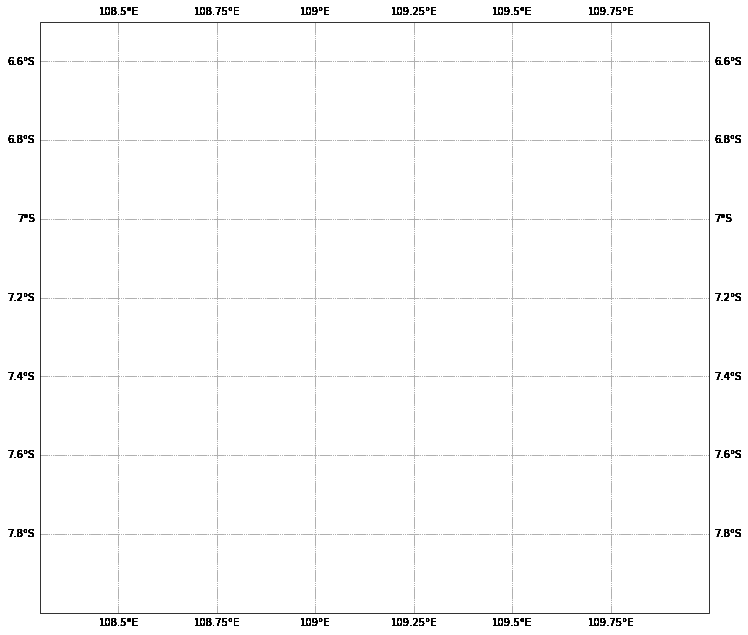

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
ax = fig. add_subplot(1, 1, 1, projection=mproj)

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
# Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')
  # ax.set_title(files[i][-41:-24])
  ax.text(90.5,28.5,files[i][-41:-24])

  camera.snap()

animation = camera.animate(interval = 1000, repeat = False)

In [ ]:
HTML(animation.to_html5_video())

### 27 Sept

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/'
!ls $datdir

NC_H08_20210927_0000_R21_FLDK.02401_02401.nc
NC_H08_20210927_0100_R21_FLDK.02401_02401.nc
NC_H08_20210927_0200_R21_FLDK.02401_02401.nc
NC_H08_20210927_0300_R21_FLDK.02401_02401.nc
NC_H08_20210927_0400_R21_FLDK.02401_02401.nc
NC_H08_20210927_0500_R21_FLDK.02401_02401.nc
NC_H08_20210927_0600_R21_FLDK.02401_02401.nc
NC_H08_20210927_0700_R21_FLDK.02401_02401.nc
NC_H08_20210927_0800_R21_FLDK.02401_02401.nc
NC_H08_20210927_0900_R21_FLDK.02401_02401.nc
NC_H08_20210927_1000_R21_FLDK.02401_02401.nc
NC_H08_20210927_1100_R21_FLDK.02401_02401.nc
NC_H08_20210927_1200_R21_FLDK.02401_02401.nc
NC_H08_20210927_1300_R21_FLDK.02401_02401.nc
NC_H08_20210927_1400_R21_FLDK.02401_02401.nc
NC_H08_20210927_1500_R21_FLDK.02401_02401.nc
NC_H08_20210927_1600_R21_FLDK.02401_02401.nc
NC_H08_20210927_1700_R21_FLDK.02401_02401.nc
NC_H08_20210927_1800_R21_FLDK.02401_02401.nc
NC_H08_20210927_1900_R21_FLDK.02401_02401.nc
NC_H08_20210927_2000_R21_FLDK.02401_02401.nc
NC_H08_20210927_2100_R21_FLDK.02401_02401.nc
NC_H08_202

In [ ]:
#Data Himawari 8
files=glob(datdir+'NC_H08*')
len(files)

24

In [ ]:
files

['/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0000_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0100_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0200_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0300_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0400_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0500_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0600_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0700_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0800_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/27sep/NC_H08_20210927_0900_R21_FLDK.02401_02401.nc',
 '/content

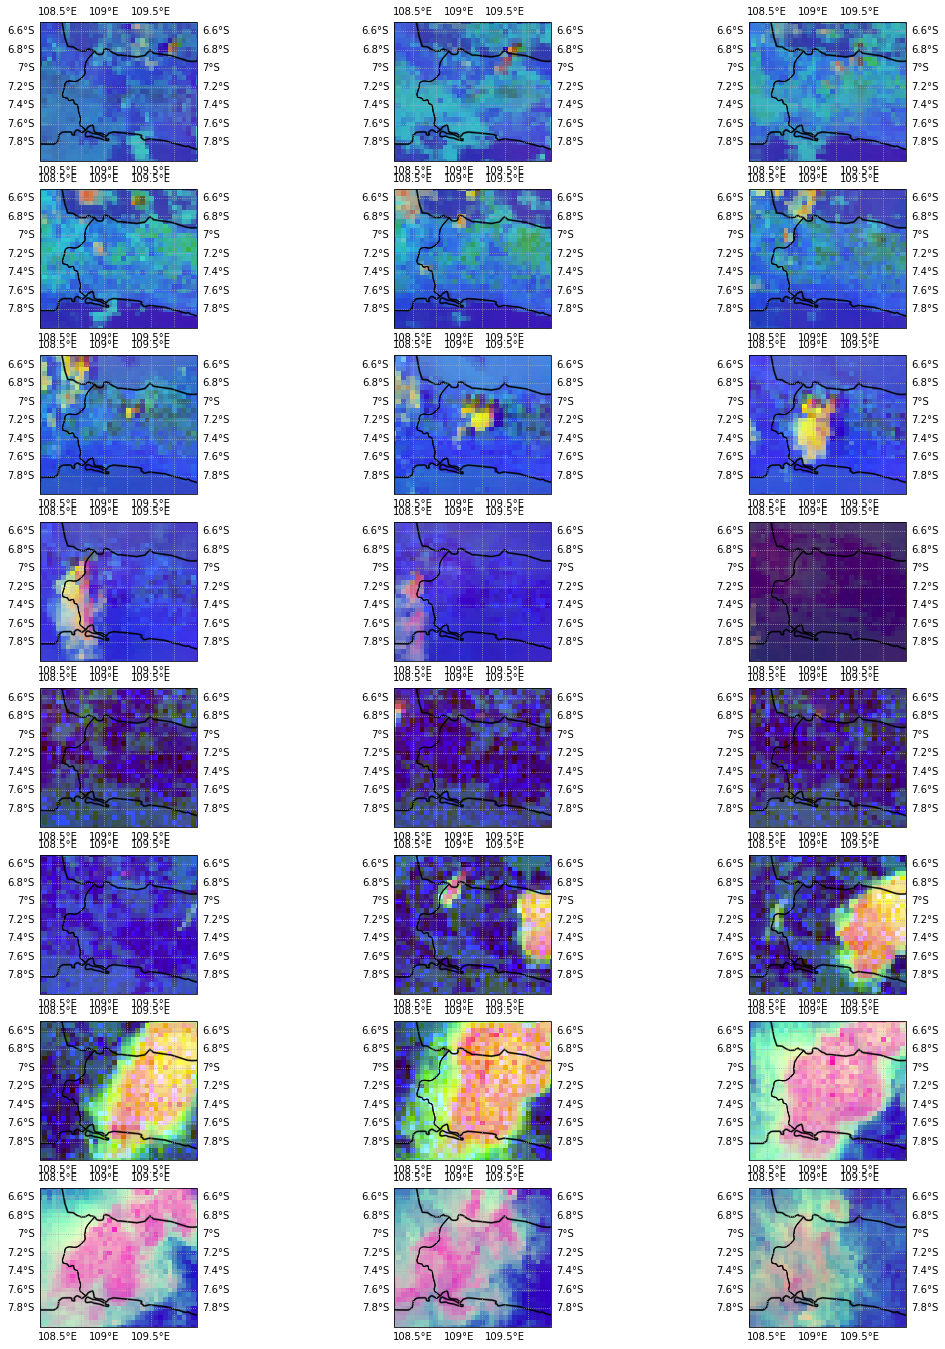

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 24))

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)
  ds_crop

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax = fig.add_subplot(8, 3, i+1, projection=mproj)
  # Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')


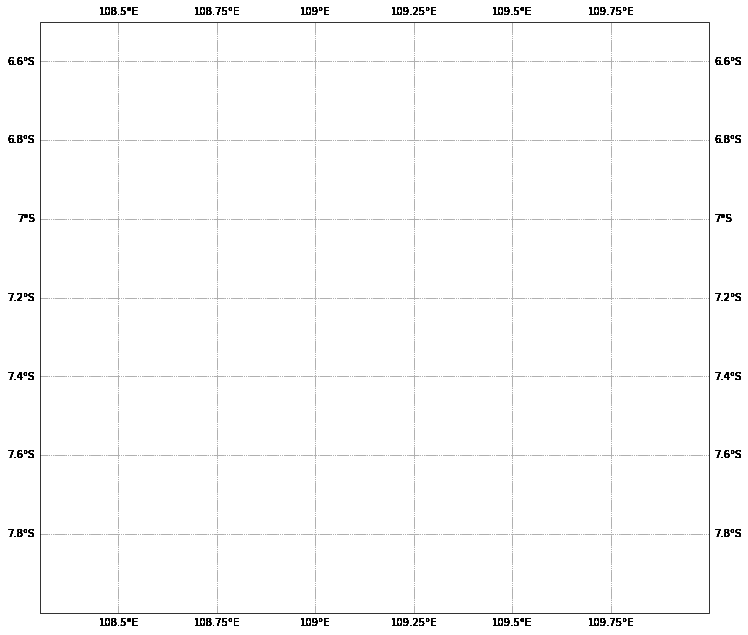

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
ax = fig. add_subplot(1, 1, 1, projection=mproj)

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
# Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')
  # ax.set_title(files[i][-41:-24])
  ax.text(90.5,28.5,files[i][-41:-24])

  camera.snap()

animation = camera.animate(interval = 1000, repeat = False)

In [ ]:
HTML(animation.to_html5_video())

### 28 Sept

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/'
!ls $datdir

NC_H08_20210928_0000_R21_FLDK.02401_02401.nc
NC_H08_20210928_0100_R21_FLDK.02401_02401.nc
NC_H08_20210928_0200_R21_FLDK.02401_02401.nc
NC_H08_20210928_0300_R21_FLDK.02401_02401.nc
NC_H08_20210928_0400_R21_FLDK.02401_02401.nc
NC_H08_20210928_0500_R21_FLDK.02401_02401.nc
NC_H08_20210928_0600_R21_FLDK.02401_02401.nc
NC_H08_20210928_0700_R21_FLDK.02401_02401.nc
NC_H08_20210928_0800_R21_FLDK.02401_02401.nc
NC_H08_20210928_0900_R21_FLDK.02401_02401.nc
NC_H08_20210928_1000_R21_FLDK.02401_02401.nc
NC_H08_20210928_1100_R21_FLDK.02401_02401.nc
NC_H08_20210928_1200_R21_FLDK.02401_02401.nc
NC_H08_20210928_1300_R21_FLDK.02401_02401.nc
NC_H08_20210928_1400_R21_FLDK.02401_02401.nc
NC_H08_20210928_1500_R21_FLDK.02401_02401.nc
NC_H08_20210928_1600_R21_FLDK.02401_02401.nc
NC_H08_20210928_1700_R21_FLDK.02401_02401.nc
NC_H08_20210928_1800_R21_FLDK.02401_02401.nc
NC_H08_20210928_1900_R21_FLDK.02401_02401.nc
NC_H08_20210928_2000_R21_FLDK.02401_02401.nc
NC_H08_20210928_2100_R21_FLDK.02401_02401.nc
NC_H08_202

In [ ]:
#Data Himawari 8
files=glob(datdir+'NC_H08*')
len(files)

24

In [ ]:
files

['/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0000_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0100_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0200_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0300_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0400_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0500_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0600_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0700_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0800_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/28sep/NC_H08_20210928_0900_R21_FLDK.02401_02401.nc',
 '/content

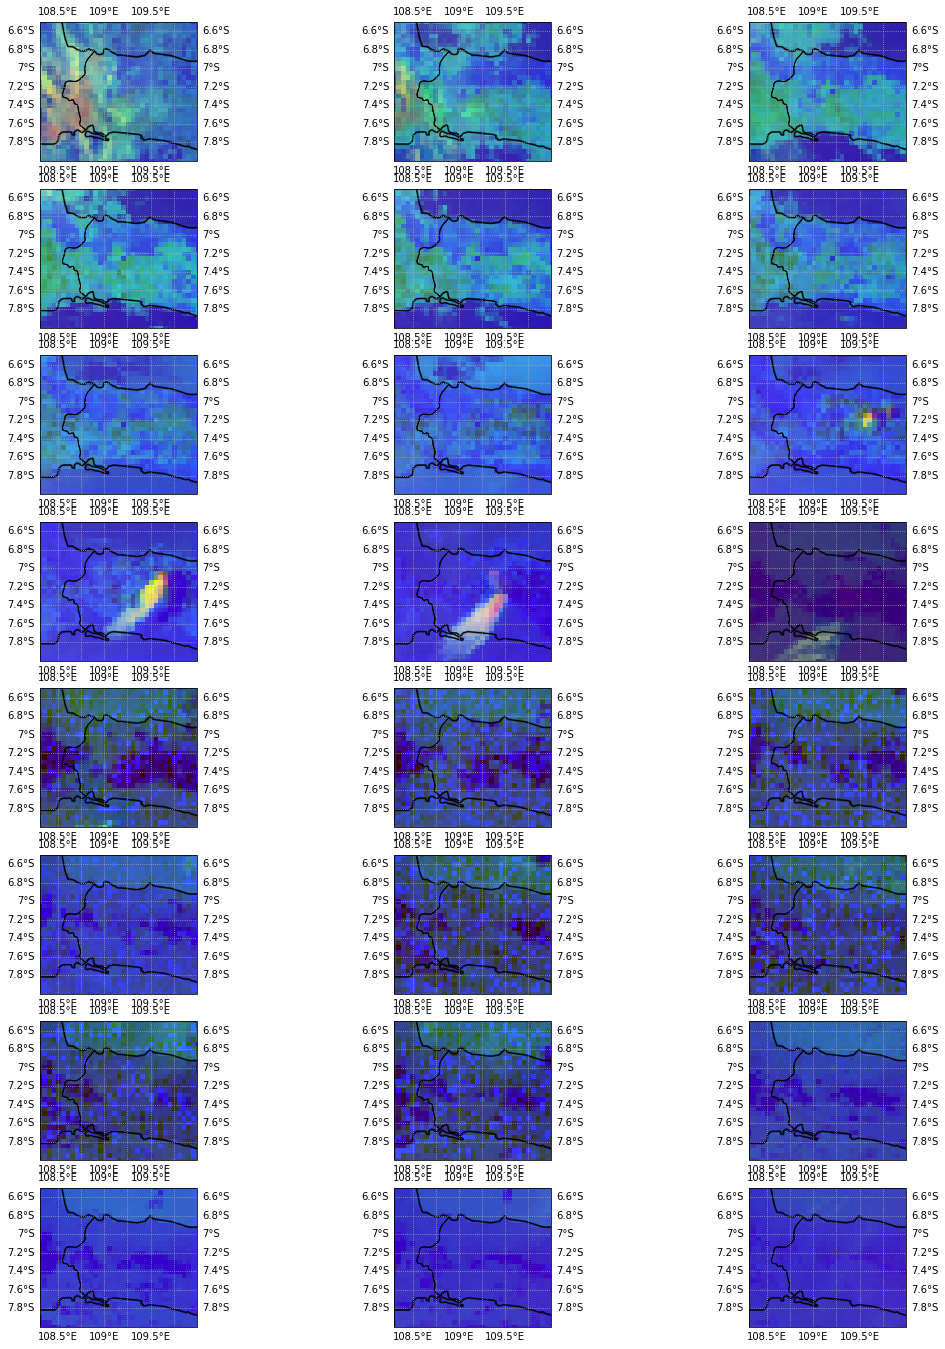

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 24))

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)
  ds_crop

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax = fig.add_subplot(8, 3, i+1, projection=mproj)
  # Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')


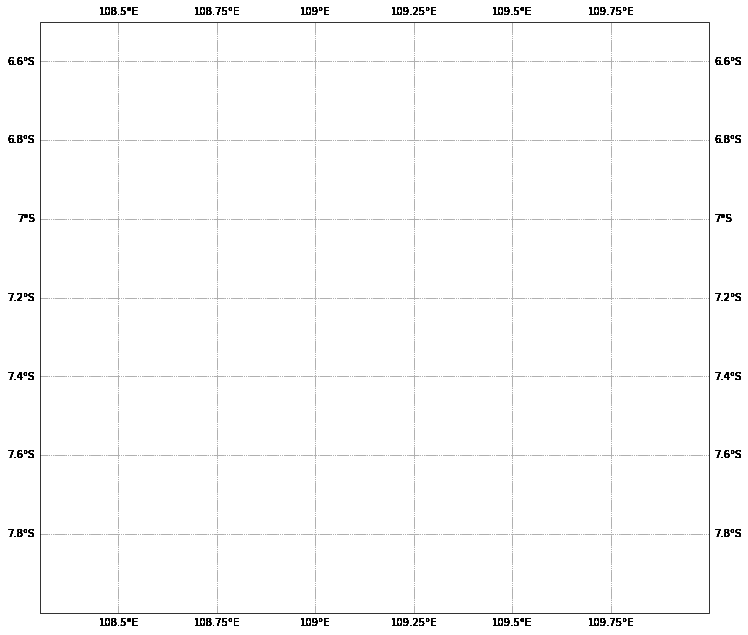

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
ax = fig. add_subplot(1, 1, 1, projection=mproj)

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
# Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')
  # ax.set_title(files[i][-41:-24])
  ax.text(90.5,28.5,files[i][-41:-24])

  camera.snap()

animation = camera.animate(interval = 1000, repeat = False)

In [ ]:
HTML(animation.to_html5_video())